In [9]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import copy

from skimage.color import rgb2gray

import warnings
warnings.filterwarnings("ignore")

In [10]:
def bilinear_interpolate_1(img, pixel):
    """
    Bilinear Interpolation
    
    Parameters:
        img(matrix) - initial unchanged image
        pixel(tuple or list of 2 elements)
        
    Return:
        float(interpolated value)
    """
    
    H, W = img.shape
    x = np.asarray(pixel[0])
    y = np.asarray(pixel[1])
    
    x_0 = np.floor(x).astype(int)
    x_1 = x_0 + 1
    y_0 = np.floor(y).astype(int)
    y_1 = y_0 + 1
    
    x_0 = np.clip(x_0, 0, H - 1)
    x_1 = np.clip(x_1, 0, H - 1)
    y_0 = np.clip(y_0, 0, W - 1)
    y_1 = np.clip(y_1, 0, W - 1)
    
    a_0 = img[ x_0, y_0 ]
    a_1 = img[ x_0, y_1 ]
    a_2 = img[ x_1, y_0 ]
    a_3 = img[ x_1, y_1 ]
    
    w_a_0 = (x - x_0) * (y - y_0)
    w_a_1 = (x - x_0) * (y_1 - y)
    w_a_2 = (x_1 - x) * (y - y_0)
    w_a_3 = (x_1 - x) * (y_1 - y)
    
    return w_a_0 * a_3 + w_a_1 * a_2 + w_a_2 * a_1 + w_a_3 * a_0
#     return w_a_0 * a_0 + w_a_1 * a_1 + w_a_2 * a_2 + w_a_3 * a_3

In [11]:
def bilinear_interpolate_2(img, pixel):
    """
    Bilinear Interpolation with 2 sequential 1 dimensional interpolation.
    
    Parameters:
        img(matrix) - initial unchanged image
        pixel(tuple or list of 2 elements)
        
    Return:
        float(interpolated value)
    """
    
    H, W = img.shape
    x = np.asarray(pixel[0])
    y = np.asarray(pixel[1])
    
    x_0 = np.floor(x).astype(int)
    x_1 = x_0 + 1
    y_0 = np.floor(y).astype(int)
    y_1 = y_0 + 1
    
    x_0 = np.clip(x_0, 0, H - 1)
    x_1 = np.clip(x_1, 0, H - 1)
    y_0 = np.clip(y_0, 0, W - 1)
    y_1 = np.clip(y_1, 0, W - 1)
    
    f_q_1_1 = img[ x_0, y_0 ]
    f_q_1_2 = img[ x_0, y_1 ]
    f_q_2_1 = img[ x_1, y_0 ]
    f_q_2_2 = img[ x_1, y_1 ]
    
    p_x_y_1 = f_q_1_1 * (x-x_1) / (x_0-x_1) + f_q_2_1 * (x-x_0) / (x_1-x_0)
    p_x_y_2 = f_q_1_2 * (x-x_1) / (x_0-x_1) + f_q_2_2 * (x-x_0) / (x_1-x_0)
    
    return p_x_y_1 * (y-y_1) / (y_0-y_1) + p_x_y_2 * (y-y_0) / (y_1-y_0)

In [12]:
def Sampling(shape, i, j):
    """
    Uniform Sampling
    
    Parameters:
        shape(list or tuple) - shape of the image we want sample from
        i(int) -  i-th index
        j(int) - j-th index
        
    Returns:
        tuple(of floats) - sampled pixel
    """
    H, W = shape
    return (2*i+1)/(2*H), (2*j+1)/(2*W)

In [14]:
def Image_Resizing(initial_img, new_img_shape):
    """
    Image Resizing
    
    Parameters:
        initial_img(matrix) - initial unchanged image
        new_img_shape(list or tuple) - shape of the new image 
        
    Returns:
        matrix(resized image)
    """
    
    H, W = initial_img.shape
    H_n, W_n = new_img_shape

    new_image = np.zeros(new_img_shape, dtype=float)

    for x in range(H_n):
        for y in range(W_n):
            pixel = Sampling(new_img_shape, x, y)
            pixel = (pixel[0] * H, pixel[1] * W)
            new_image[x, y] = bilinear_interpolate_1(initial_img, pixel)
    return new_image

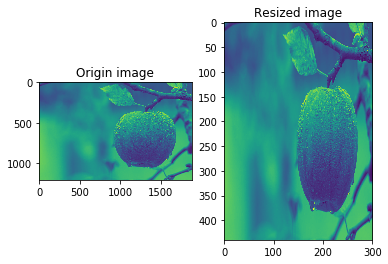

In [15]:
img=mpimg.imread('inputs/20190926/2.jpg')
img = rgb2gray(img)

plt.subplot(1,2,1)
plt.title('Origin image')
plt.imshow(img)

plt.subplot(1,2,2)
plt.title('Resized image')

# new_image_shape = tuple([2*x for x in img.shape])

new_image_shape = [440, 300]

resized = Image_Resizing(img, new_image_shape)

plt.imshow(resized)

plt.show();

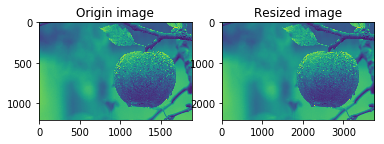

In [16]:
plt.subplot(1,2,1)
plt.title('Origin image')
plt.imshow(img)

plt.subplot(1,2,2)
plt.title('Resized image')

new_image_shape = tuple([2*x for x in img.shape])

# new_image_shape = [440, 300]

resized = Image_Resizing(img, new_image_shape)

plt.imshow(resized)

plt.show();